#### Violin Plot 

In [1]:
import seaborn as sb
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as clt

In [2]:
#data_nopt_sphere = sio.loadmat('nopt_shpere.mat')['nopt_ssim']
data_3u_psnr = sio.loadmat('measurement_data.mat')['psnr_3u']
data_3u_ssim = sio.loadmat('measurement_data.mat')['ssim_3u']
data_2u_psnr = sio.loadmat('measurement_data.mat')['psnr_2u']
data_2u_ssim = sio.loadmat('measurement_data.mat')['ssim_2u']

data_ssim = np.concatenate([data_2u_ssim,data_3u_ssim],axis = 0)
data_psnr = np.concatenate([data_2u_psnr,data_3u_psnr],axis = 0)
#data_optrr_sphere = sio.loadmat('opt_shpere_rr.mat')['opt_ssim_rr']
#data_opthomo_6m = sio.loadmat('opt_homo_6m.mat')['opt_ssim_homo']
#data_opt_sphere_low = sio.loadmat('sphere8-16m_2-8u.mat')['data_mean_psnr']

In [3]:
si_num = 300
bf_num = 2
ang_num = 2
mode_num = 2
dist_num = 3

In [4]:
dataset_ssim = []
dataset_psnr = []
for i in range(dist_num):
    if i == 0:
        d = 3
        u_num = 2
    elif i == 1:
        d = 6
        u_num = 2
    elif i == 2:
        d = 3
        u_num = 3
    for j in range(ang_num):
        if j == 0:
            ang = 30
        elif j == 1:
            ang = 60
        for k in range(bf_num):
            if k == 0:
                bfmode = 'AD Predefined'
            elif k == 1:
                bfmode = 'Optimized Beamforming'
            for l in range(mode_num):
                if l == 0:
                    mode = 'Multicast'
                elif l == 1:
                    mode = 'Unicast'
                for n in range(si_num):
                    dataset_ssim.append([d, u_num, ang,bfmode, mode, mode + ' ('+ bfmode +')', data_ssim[i,j,k,l,n]])
                    dataset_psnr.append([d, u_num, ang,bfmode, mode, mode + ' ('+ bfmode +')', data_psnr[i,j,k,l,n]])

In [5]:
dataset_ssim_pd = pd.DataFrame(dataset_ssim, columns =['Distance (m)', 'Number of User', 'Max Angular Spacing $(^\circ)$', 'Beamforming Mode','Transmission Mode','Joint Label','Average SSIM'])

In [6]:
dataset_psnr_pd = pd.DataFrame(dataset_psnr, columns =['Distance (m)', 'Number of User', 'Max Angular Spacing $(^\circ)$', 'Beamforming Mode','Transmission Mode','Joint Label','Average PSNR (dB)'])

In [7]:
dataset_ssim_plot =  dataset_ssim_pd[(dataset_ssim_pd['Distance (m)']==3) & (dataset_ssim_pd['Max Angular Spacing $(^\circ)$']==30)]
dataset_psnr_plot =  dataset_psnr_pd[(dataset_psnr_pd['Distance (m)']==3) & (dataset_psnr_pd['Max Angular Spacing $(^\circ)$']==30)]

In [8]:
dataset_psnr_pd

,Distance (m),Number of User,Max Angular Spacing $(^\circ)$,Beamforming Mode,Transmission Mode,Joint Label,Average PSNR (dB)
0,3,2,30,AD Predefined,Multicast,Multicast (AD Predefined),39.990000
1,3,2,30,AD Predefined,Multicast,Multicast (AD Predefined),39.990000
2,3,2,30,AD Predefined,Multicast,Multicast (AD Predefined),39.965000
3,3,2,30,AD Predefined,Multicast,Multicast (AD Predefined),39.940000
4,3,2,30,AD Predefined,Multicast,Multicast (AD Predefined),39.940000
...,...,...,...,...,...,...,...
7195,3,3,60,Optimized Beamforming,Unicast,Unicast (Optimized Beamforming),36.190000
7196,3,3,60,Optimized Beamforming,Unicast,Unicast (Optimized Beamforming),36.186667
7197,3,3,60,Optimized Beamforming,Unicast,Unicast (Optimized Beamforming),36.173333
7198,3,3,60,Optimized Beamforming,Unicast,Unicast (Optimized Beamforming),36.153333


In [39]:
a = dataset_plot[dataset_plot['# of Panel']==1]
b = dataset_plot[dataset_plot['# of Panel']==2]
c = dataset_plot[dataset_plot['# of Panel']==4]
d = dataset_plot[dataset_plot['# of Panel']==6]
e = dataset_plot[dataset_plot['# of Panel']==8]

KeyError: '# of Panel'

In [112]:
mx1=a.groupby('# of User')['Total Utility (MB)'].median()
mx2=b.groupby('# of User')['Total Utility (MB)'].median()
mx3=c.groupby('# of User')['Total Utility (MB)'].median()
mx4=d.groupby('# of User')['Total Utility (MB)'].median()
mx5=e.groupby('# of User')['Total Utility (MB)'].median()

In [113]:
mx5

# of User
1     90.628980
2    122.658382
3    144.744681
4    187.379862
5    198.329600
Name: Total Utility (MB), dtype: float64

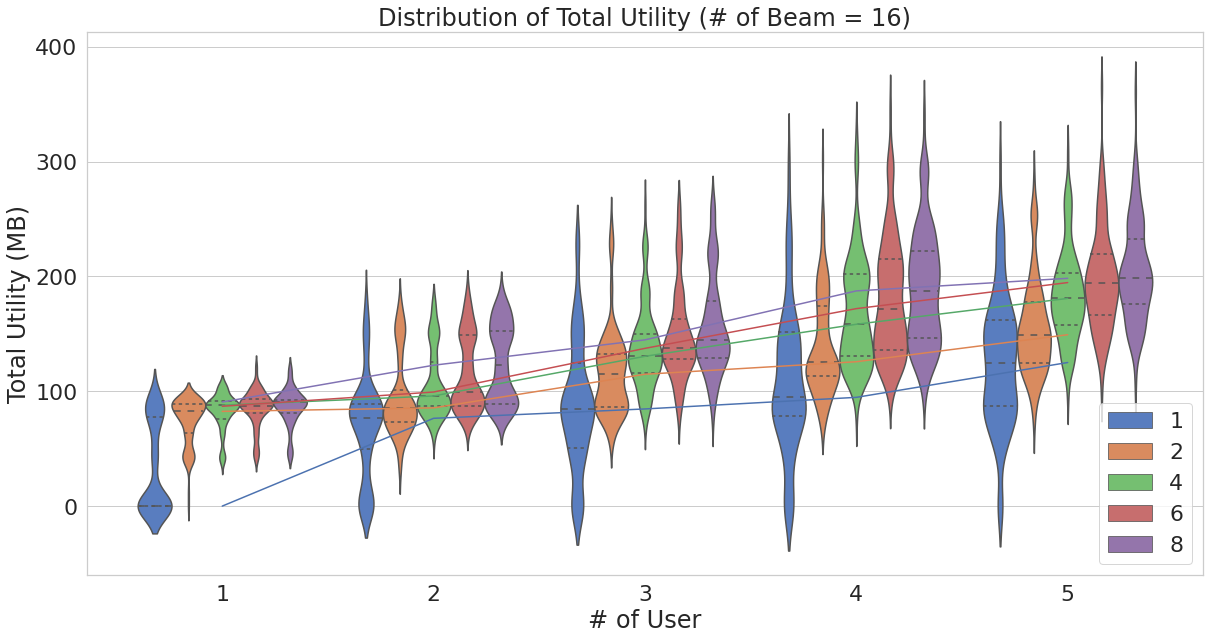

In [115]:
sb.set(font_scale = 2)
sb.set_style("whitegrid")
ax = plt.figure(figsize=(20,10))
ax = sb.violinplot(x = "# of User", y = "Total Utility (MB)", 
                   hue="# of Panel", data=dataset_plot, palette="muted", 
                   scale="count", inner="quartile",
                    scale_hue=False, bw=.3)
ax = sb.lineplot(x=[0,1,2,3,4], y=mx1.values)
ax = sb.lineplot(x=[0,1,2,3,4], y=mx2.values)
ax = sb.lineplot(x=[0,1,2,3,4], y=mx3.values)
ax = sb.lineplot(x=[0,1,2,3,4], y=mx4.values)
ax = sb.lineplot(x=[0,1,2,3,4], y=mx5.values)
#plt.ylim(0, 350)
ax.legend(loc='lower right')
ax.set_title('Distribution of Total Utility (# of Beam = 16)')
plt.savefig('number_of_user.jpg')

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import ptitprince as pt
import numpy as np
import scipy.io as sio
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import itertools

In [10]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [11]:
from fontTools.ttLib import TTFont
font = TTFont("/System/Library/Fonts/Helvetica.ttc", fontNumber=0)
font.save("Helvetica.ttf")

'created' timestamp seems very low; regarding as unix timestamp


In [12]:
fm = font_manager.json_load("/Users/changhange/.matplotlib/fontlist-v330.json")
fm.findfont("serif", rebuild_if_missing=False)
fm.findfont("serif", fontext="afm", rebuild_if_missing=False)

'/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm/pncr8a.afm'

In [13]:
plt.rcParams.update({'font.size': 45, "font.family":'sans-serif'})
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams["axes.edgecolor"] = "0.5"
plt.rcParams["axes.linewidth"]  = 4
plt.rcParams["axes.spines.right"]  = False
plt.rcParams["axes.spines.top"]  = False

In [14]:
from matplotlib.patches import PathPatch

def adjust_box_widths(ax, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through axes artists:
    for c in ax.get_children():

        # searching for PathPatches
        if isinstance(c, PathPatch):
            # getting current width of box:
            p = c.get_path()
            verts = p.vertices
            verts_sub = verts[:-1]
            xmin = np.min(verts_sub[:, 0])
            xmax = np.max(verts_sub[:, 0])
            xmid = 0.5*(xmin+xmax)
            xhalf = 0.5*(xmax - xmin)

            # setting new width of box
            xmin_new = xmid-fac*xhalf
            xmax_new = xmid+fac*xhalf
            verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
            verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

            # setting new width of median line
            for l in ax.lines:
                if np.all(l.get_xdata() == [xmin, xmax]):
                    l.set_xdata([xmin_new, xmax_new])

In [22]:
dataset_ssim_plot =  dataset_ssim_pd[(dataset_ssim_pd['Distance (m)']==3) & (dataset_ssim_pd['Max Angular Spacing $(^\circ)$']==30)]
dataset_psnr_plot =  dataset_psnr_pd[(dataset_psnr_pd['Distance (m)']==3) & (dataset_psnr_pd['Max Angular Spacing $(^\circ)$']==30)]

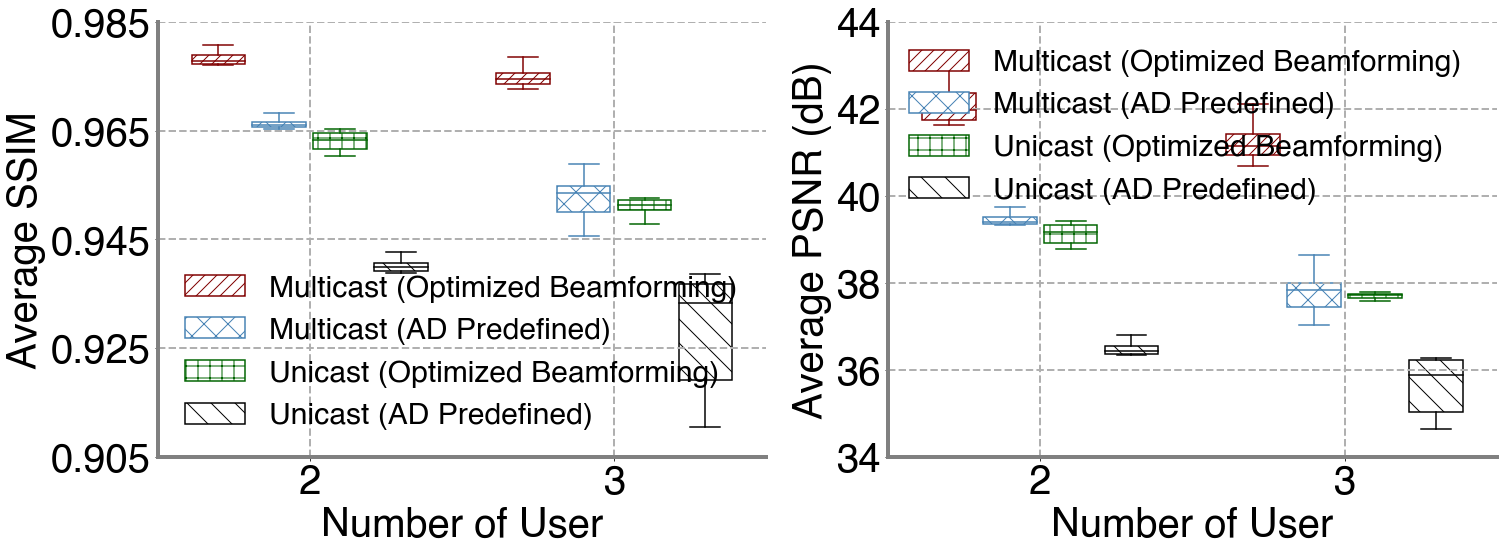

In [25]:
#dx="Max Angular Spacing $(^\circ)$"; dy="Average SSIM"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = 0.3
fig, ax3 = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
# ax3=pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_pd,  
#                 palette = pal, bw = sigma, width_viol = .5, width_box = .25, orient = ort,alpha = .65, dodge = False, pointplot = True)
sns.boxplot(ax = ax3[0],y = "Average SSIM", x = "Number of User", hue_order = ["Multicast (Optimized Beamforming)", "Multicast (AD Predefined)", "Unicast (Optimized Beamforming)", "Unicast (AD Predefined)"], 
                  data = dataset_ssim_plot, hue = "Joint Label",showfliers = False)
#ax3.legend(loc='upper left')
ax3[0].grid(True, which="both",ls="--", lw=2)
ax3[0].xaxis.label.set_size(40)
ax3[0].yaxis.label.set_size(40)
ax3[0].tick_params(axis='both', which='major',labelsize=40)
ax3[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))

adjust_box_widths(ax3[0], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[0].artists,ax3[0].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[0].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[0].legend(ax3[0].artists,["Multicast (Optimized Beamforming) ", "Multicast (AD Predefined) ", "Unicast (Optimized Beamforming) ", "Unicast (AD Predefined) "], 
           fancybox=False, framealpha=0, prop={'size':30})


sns.boxplot(ax = ax3[1],y = "Average PSNR (dB)", x = "Number of User", hue_order = ["Multicast (Optimized Beamforming)", "Multicast (AD Predefined)", "Unicast (Optimized Beamforming)", "Unicast (AD Predefined)"], 
                  data = dataset_psnr_plot, hue = "Joint Label",showfliers = False)
#ax3.legend(loc='upper left')
ax3[1].grid(True, which="both",ls="--", lw=2)
ax3[1].xaxis.label.set_size(40)
ax3[1].yaxis.label.set_size(40)
ax3[1].tick_params(axis='both', which='major',labelsize=40)
ax3[1].set(ylim = [34,44], yticks = np.arange(34, 44.0001, 2))

adjust_box_widths(ax3[1], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[1].artists,ax3[1].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[1].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[1].legend(ax3[1].artists,["Multicast (Optimized Beamforming) ", "Multicast (AD Predefined) ", "Unicast (Optimized Beamforming) ", "Unicast (AD Predefined) "], 
           fancybox=False, framealpha=0, prop={'size':30})


#plt.show()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(fancybox=False,framealpha=0,edgecolor = 'white',prop={'size':40})
plt.savefig('testbed_user_new_large.pdf', bbox_inches='tight')

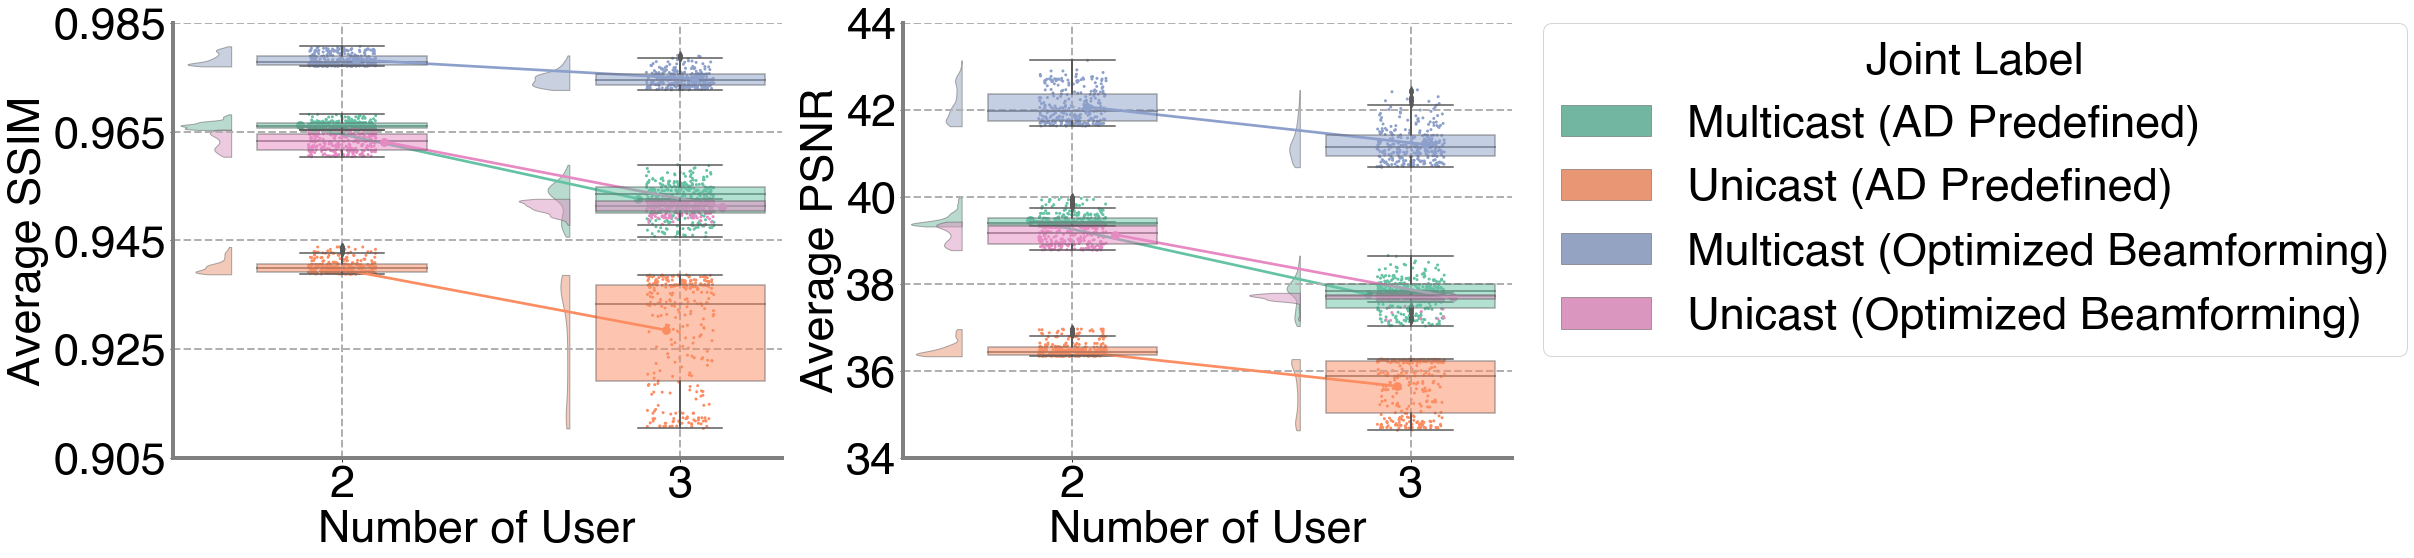

In [170]:
fig, axs = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
dx="Number of User"; dy1="Average SSIM"; dy2 = "Average PSNR"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = .3

pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_ssim_plot, ax=axs[0],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
pt.RainCloud(x = dx, y = dy2, hue = dhue, data = dataset_psnr_plot, ax=axs[1],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
#ax3.legend(loc='upper left')
axs[0].grid(True, which="both",ls="--", lw=2)
axs[0].xaxis.label.set_size(45)
axs[0].yaxis.label.set_size(45)
axs[0].tick_params(axis='both', which='major',labelsize=45)
axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
axs[0].get_legend().remove()

axs[1].grid(True, which="both",ls="--", lw=2)
axs[1].xaxis.label.set_size(45)
axs[1].yaxis.label.set_size(45)
axs[1].tick_params(axis='both', which='major',labelsize=45)
axs[1].set(ylim = [34,44], yticks = np.arange(34, 44.0001, 2))
#axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
#axs[1].get_legend().remove()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(prop={'size':40})
plt.savefig('testbed_user.pdf', bbox_inches='tight')

In [26]:
dataset_ssim_plot =  dataset_ssim_pd[(dataset_ssim_pd['Number of User']==2) & (dataset_ssim_pd['Max Angular Spacing $(^\circ)$']==30)]
dataset_psnr_plot =  dataset_psnr_pd[(dataset_psnr_pd['Number of User']==2) & (dataset_psnr_pd['Max Angular Spacing $(^\circ)$']==30)]

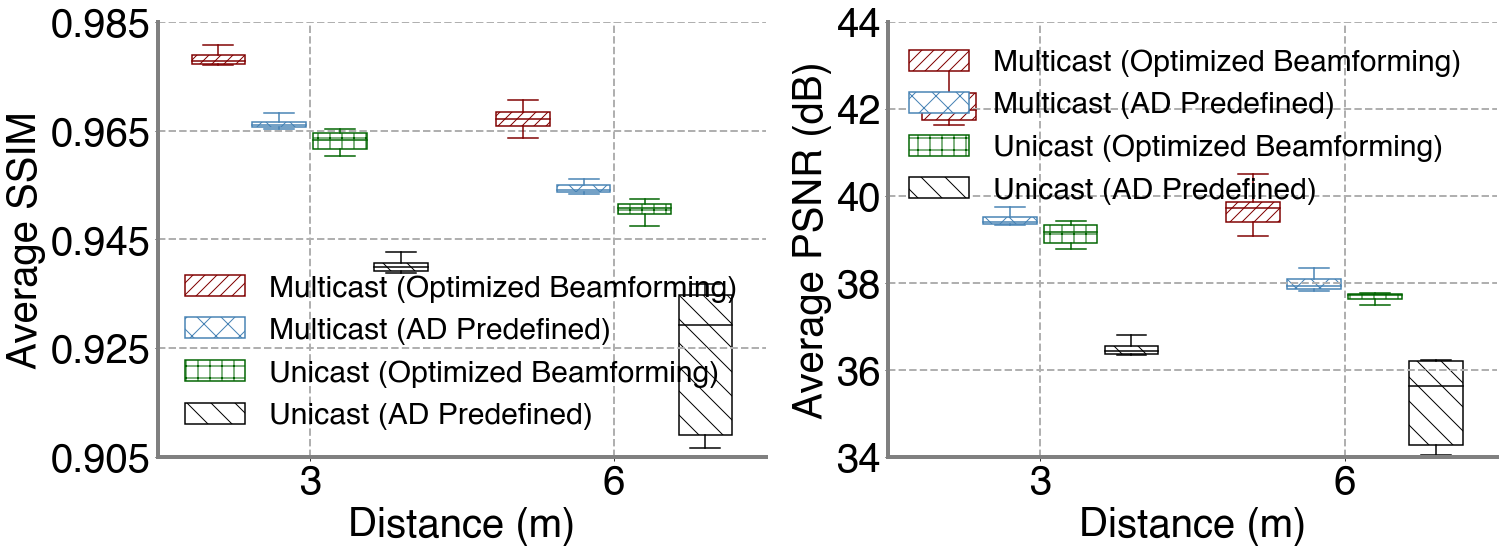

In [28]:
#dx="Max Angular Spacing $(^\circ)$"; dy="Average SSIM"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = 0.3
fig, ax3 = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
# ax3=pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_pd,  
#                 palette = pal, bw = sigma, width_viol = .5, width_box = .25, orient = ort,alpha = .65, dodge = False, pointplot = True)
sns.boxplot(ax = ax3[0],y = "Average SSIM", x = "Distance (m)", hue_order = ["Multicast (Optimized Beamforming)", "Multicast (AD Predefined)", "Unicast (Optimized Beamforming)", "Unicast (AD Predefined)"], 
                  data = dataset_ssim_plot, hue = "Joint Label",showfliers = False)
#ax3.legend(loc='upper left')
ax3[0].grid(True, which="both",ls="--", lw=2)
ax3[0].xaxis.label.set_size(40)
ax3[0].yaxis.label.set_size(40)
ax3[0].tick_params(axis='both', which='major',labelsize=40)
ax3[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))

adjust_box_widths(ax3[0], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[0].artists,ax3[0].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[0].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[0].legend(ax3[0].artists,["Multicast (Optimized Beamforming) ", "Multicast (AD Predefined) ", "Unicast (Optimized Beamforming) ", "Unicast (AD Predefined) "], 
           fancybox=False, framealpha=0, prop={'size':30})


sns.boxplot(ax = ax3[1],y = "Average PSNR (dB)", x = "Distance (m)", hue_order = ["Multicast (Optimized Beamforming)", "Multicast (AD Predefined)", "Unicast (Optimized Beamforming)", "Unicast (AD Predefined)"], 
                  data = dataset_psnr_plot, hue = "Joint Label",showfliers = False)
#ax3.legend(loc='upper left')
ax3[1].grid(True, which="both",ls="--", lw=2)
ax3[1].xaxis.label.set_size(40)
ax3[1].yaxis.label.set_size(40)
ax3[1].tick_params(axis='both', which='major',labelsize=40)
ax3[1].set(ylim = [34,44], yticks = np.arange(34, 44.0001, 2))

adjust_box_widths(ax3[1], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[1].artists,ax3[1].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[1].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[1].legend(ax3[1].artists,["Multicast (Optimized Beamforming) ", "Multicast (AD Predefined) ", "Unicast (Optimized Beamforming) ", "Unicast (AD Predefined) "], 
           fancybox=False, framealpha=0, prop={'size':30})


#plt.show()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(fancybox=False,framealpha=0,edgecolor = 'white',prop={'size':40})
plt.savefig('testbed_distance_new_large.pdf', bbox_inches='tight')

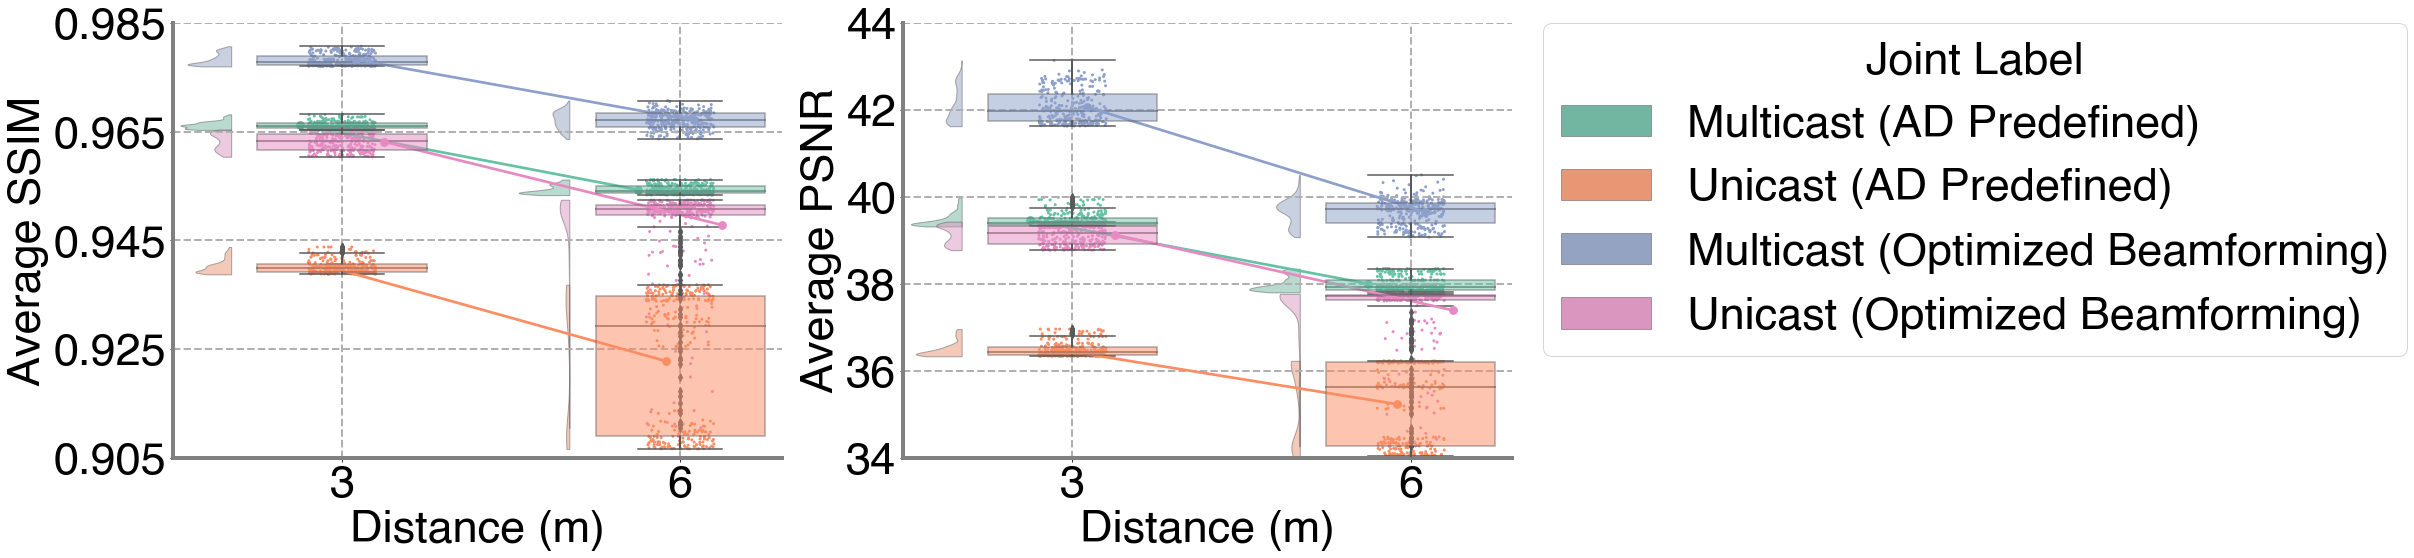

In [172]:
fig, axs = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
dx="Distance (m)"; dy1="Average SSIM"; dy2 = "Average PSNR"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = .3

pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_ssim_plot, ax=axs[0],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
pt.RainCloud(x = dx, y = dy2, hue = dhue, data = dataset_psnr_plot, ax=axs[1],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
#ax3.legend(loc='upper left')
axs[0].grid(True, which="both",ls="--", lw=2)
axs[0].xaxis.label.set_size(45)
axs[0].yaxis.label.set_size(45)
axs[0].tick_params(axis='both', which='major',labelsize=45)
axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
axs[0].get_legend().remove()

axs[1].grid(True, which="both",ls="--", lw=2)
axs[1].xaxis.label.set_size(45)
axs[1].yaxis.label.set_size(45)
axs[1].tick_params(axis='both', which='major',labelsize=45)
axs[1].set(ylim = [34,44], yticks = np.arange(34, 44.0001, 2))
#axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
#axs[1].get_legend().remove()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(prop={'size':40})
plt.savefig('testbed_distance.pdf', bbox_inches='tight')

In [30]:
dataset_ssim_plot =  dataset_ssim_pd[(dataset_ssim_pd['Number of User']==3) & (dataset_ssim_pd['Distance (m)']==3)]
dataset_psnr_plot =  dataset_psnr_pd[(dataset_psnr_pd['Number of User']==3) & (dataset_psnr_pd['Distance (m)']==3)]

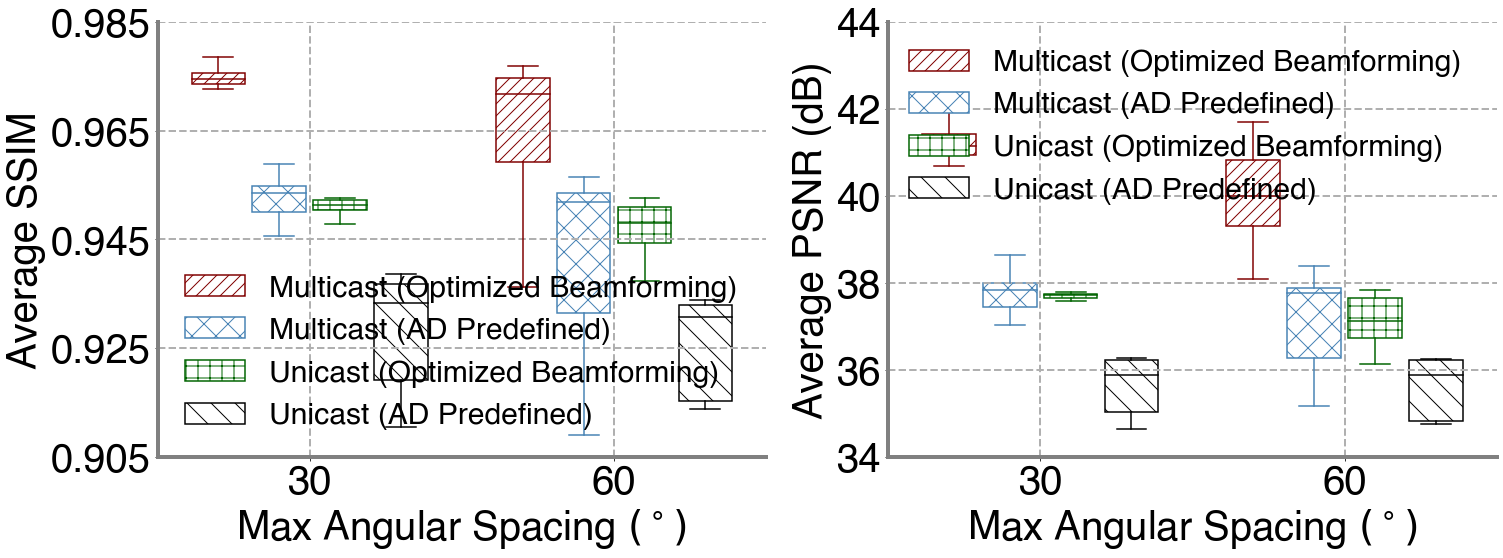

In [31]:
#dx="Max Angular Spacing $(^\circ)$"; dy="Average SSIM"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = 0.3
fig, ax3 = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
# ax3=pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_pd,  
#                 palette = pal, bw = sigma, width_viol = .5, width_box = .25, orient = ort,alpha = .65, dodge = False, pointplot = True)
sns.boxplot(ax = ax3[0],y = "Average SSIM", x = "Max Angular Spacing $(^\circ)$", hue_order = ["Multicast (Optimized Beamforming)", "Multicast (AD Predefined)", "Unicast (Optimized Beamforming)", "Unicast (AD Predefined)"], 
                  data = dataset_ssim_plot, hue = "Joint Label",showfliers = False)
#ax3.legend(loc='upper left')
ax3[0].grid(True, which="both",ls="--", lw=2)
ax3[0].xaxis.label.set_size(40)
ax3[0].yaxis.label.set_size(40)
ax3[0].tick_params(axis='both', which='major',labelsize=40)
ax3[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))

adjust_box_widths(ax3[0], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[0].artists,ax3[0].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[0].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[0].legend(ax3[0].artists,["Multicast (Optimized Beamforming) ", "Multicast (AD Predefined) ", "Unicast (Optimized Beamforming) ", "Unicast (AD Predefined) "], 
           fancybox=False, framealpha=0, prop={'size':30})


sns.boxplot(ax = ax3[1],y = "Average PSNR (dB)", x = "Max Angular Spacing $(^\circ)$", hue_order = ["Multicast (Optimized Beamforming)", "Multicast (AD Predefined)", "Unicast (Optimized Beamforming)", "Unicast (AD Predefined)"], 
                  data = dataset_psnr_plot, hue = "Joint Label",showfliers = False)
#ax3.legend(loc='upper left')
ax3[1].grid(True, which="both",ls="--", lw=2)
ax3[1].xaxis.label.set_size(40)
ax3[1].yaxis.label.set_size(40)
ax3[1].tick_params(axis='both', which='major',labelsize=40)
ax3[1].set(ylim = [34,44], yticks = np.arange(34, 44.0001, 2))

adjust_box_widths(ax3[1], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black','maroon','steelblue','darkgreen','black']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[1].artists,ax3[1].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[1].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[1].legend(ax3[1].artists,["Multicast (Optimized Beamforming) ", "Multicast (AD Predefined) ", "Unicast (Optimized Beamforming) ", "Unicast (AD Predefined) "], 
           fancybox=False, framealpha=0, prop={'size':30})


#plt.show()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(fancybox=False,framealpha=0,edgecolor = 'white',prop={'size':40})
plt.savefig('testbed_angularspacing_new_large.pdf', bbox_inches='tight')

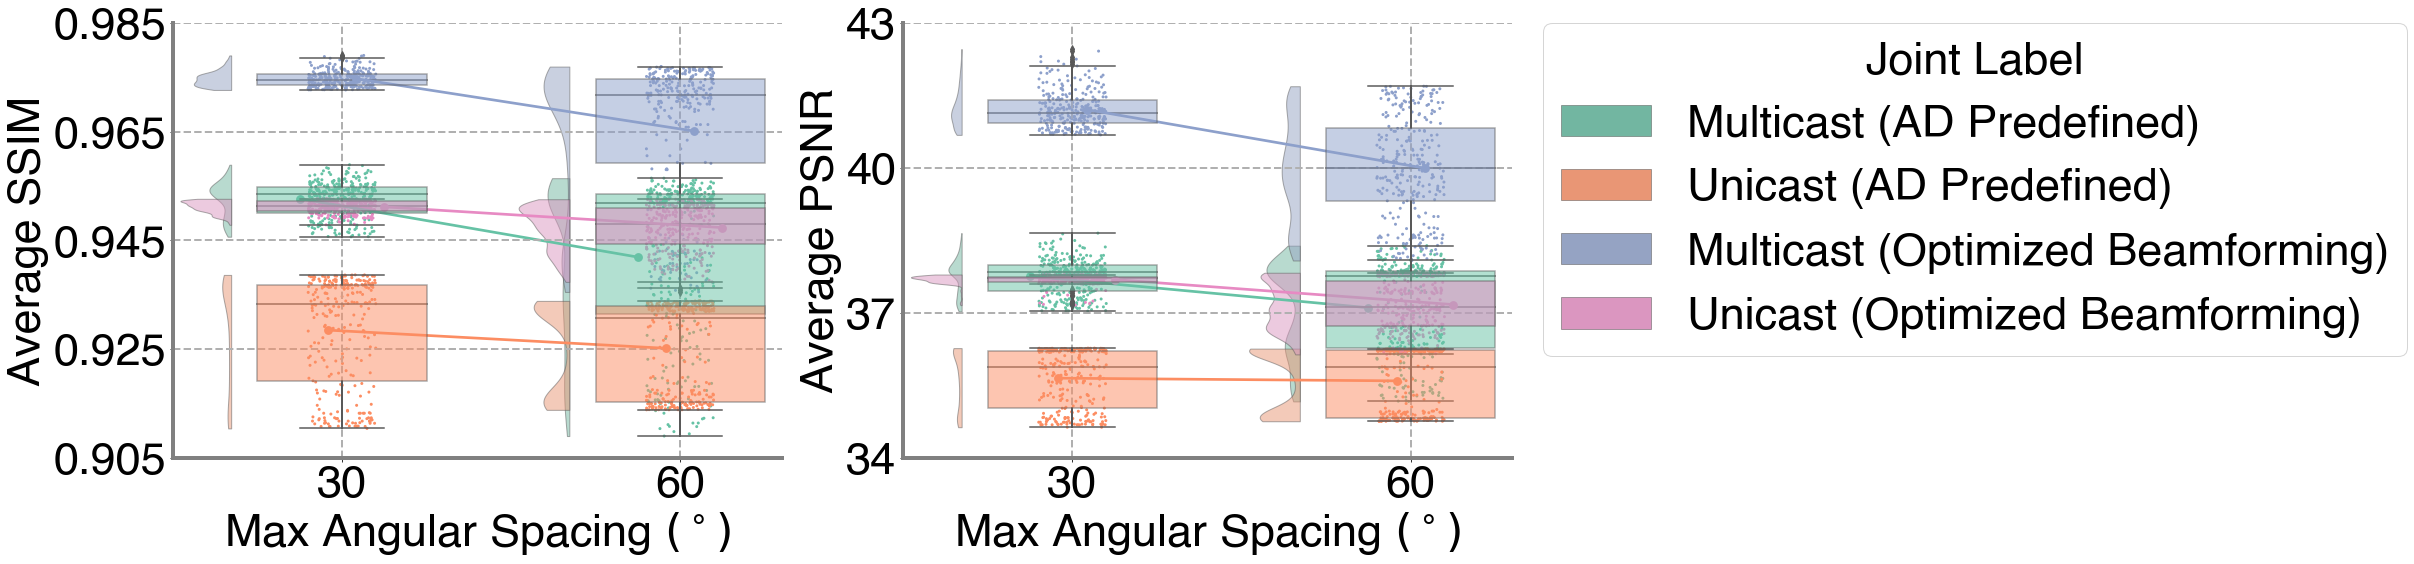

In [186]:
fig, axs = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
dx="Max Angular Spacing $(^\circ)$"; dy1="Average SSIM"; dy2 = "Average PSNR"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = .3

pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_ssim_plot, ax=axs[0],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
pt.RainCloud(x = dx, y = dy2, hue = dhue, data = dataset_psnr_plot, ax=axs[1],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
#ax3.legend(loc='upper left')
axs[0].grid(True, which="both",ls="--", lw=2)
axs[0].xaxis.label.set_size(45)
axs[0].yaxis.label.set_size(45)
axs[0].tick_params(axis='both', which='major',labelsize=45)
axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
axs[0].get_legend().remove()

axs[1].grid(True, which="both",ls="--", lw=2)
axs[1].xaxis.label.set_size(45)
axs[1].yaxis.label.set_size(45)
axs[1].tick_params(axis='both', which='major',labelsize=45)
axs[1].set(ylim = [34,43], yticks = np.arange(34, 43.0001, 3))
#axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
#axs[1].get_legend().remove()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(prop={'size':40})
plt.savefig('testbed_angularspacing.pdf', bbox_inches='tight')

### Processing RR data

In [72]:
data_rr_ssim = sio.loadmat('measurement_data_rr.mat')['ssim_rr']
data_rr_psnr = sio.loadmat('measurement_data_rr.mat')['psnr_rr']

In [73]:
u_num = 2
rr_num = 2
si_num = 300

In [74]:
dataset_ssim_rr = []
dataset_psnr_rr = []
for i in range(u_num):
    if i == 0:
        u = 2
    elif i ==1:
        u = 3
    for j in range(rr_num):
        if j == 0:
            rrmode = 'Multicast w/ Optimized Scheduler'
        if j == 1:
            rrmode = 'Multicast w/ Round Robin'
        for k in range(si_num):
            dataset_ssim_rr.append([u, rrmode, data_rr_ssim[i,j,k]])
            dataset_psnr_rr.append([u, rrmode, data_rr_psnr[i,j,k]])

In [75]:
dataset_rr_ssim_pd = pd.DataFrame(dataset_ssim_rr, columns =['Number of User','Scheduler','Average SSIM'])
dataset_rr_psnr_pd = pd.DataFrame(dataset_psnr_rr, columns =['Number of User','Scheduler','Average PSNR (dB)'])

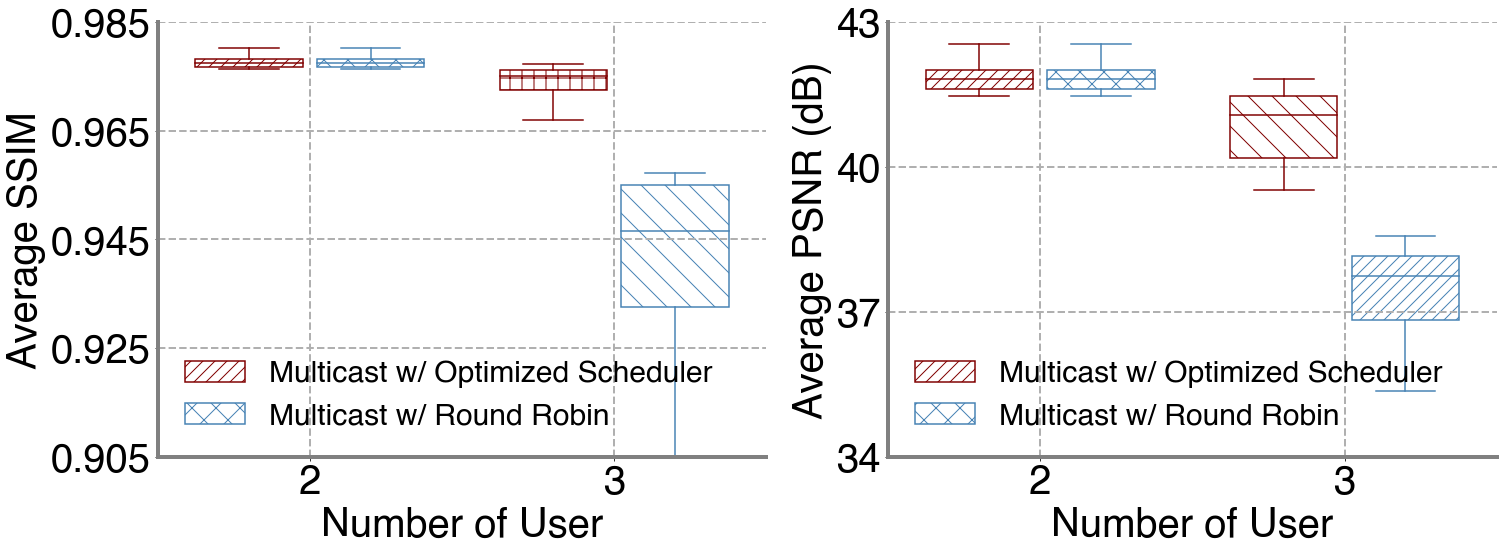

In [79]:
#dx="Max Angular Spacing $(^\circ)$"; dy="Average SSIM"; dhue="Joint Label"; ort="v"; pal="Set2"; sigma = 0.3
fig, ax3 = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
# ax3=pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_pd,  
#                 palette = pal, bw = sigma, width_viol = .5, width_box = .25, orient = ort,alpha = .65, dodge = False, pointplot = True)
sns.boxplot(ax = ax3[0],y = "Average SSIM", x = "Number of User", hue_order = ["Multicast w/ Optimized Scheduler", "Multicast w/ Round Robin"], 
                  data = dataset_rr_ssim_pd, hue = "Scheduler",showfliers = False)
#ax3.legend(loc='upper left')
ax3[0].grid(True, which="both",ls="--", lw=2)
ax3[0].xaxis.label.set_size(40)
ax3[0].yaxis.label.set_size(40)
ax3[0].tick_params(axis='both', which='major',labelsize=40)
ax3[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))

adjust_box_widths(ax3[0], 0.9)

hatches = ['//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','maroon','steelblue']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[0].artists,ax3[0].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[0].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[0].legend(ax3[0].artists,["Multicast w/ Optimized Scheduler", "Multicast w/ Round Robin"], 
           fancybox=False, framealpha=0, prop={'size':30})


sns.boxplot(ax = ax3[1],y = "Average PSNR (dB)", x = "Number of User", hue_order = ["Multicast w/ Optimized Scheduler", "Multicast w/ Round Robin"], 
                  data = dataset_rr_psnr_pd, hue = "Scheduler",showfliers = False)
#ax3.legend(loc='upper left')
ax3[1].grid(True, which="both",ls="--", lw=2)
ax3[1].xaxis.label.set_size(40)
ax3[1].yaxis.label.set_size(40)
ax3[1].tick_params(axis='both', which='major',labelsize=40)
ax3[1].set(ylim = [34,43], yticks = np.arange(34, 43.0001, 3))

adjust_box_widths(ax3[1], 0.9)

hatches = ['//', 'x', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\','//', 'x', '+', '\\']
edge_colors = ['maroon','steelblue','maroon','steelblue']
count = 0
for hatch, edge_color, patch, line in zip(hatches, edge_colors,ax3[1].artists,ax3[1].lines):
    patch.set_hatch(hatch)
    patch.set(facecolor='white')
    patch.set(edgecolor = edge_color)
    for j in range(count*5,count*5+5):
        line = ax3[1].lines[j]
        line.set_color(edge_color)
        line.set_mfc(edge_color)
        line.set_mec(edge_color)
    count += 1

ax3[1].legend(ax3[1].artists,["Multicast w/ Optimized Scheduler", "Multicast w/ Round Robin"], 
           fancybox=False, framealpha=0, prop={'size':30})


#plt.show()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(fancybox=False,framealpha=0,edgecolor = 'white',prop={'size':40})
plt.savefig('testbed_rr_new.pdf', bbox_inches='tight')

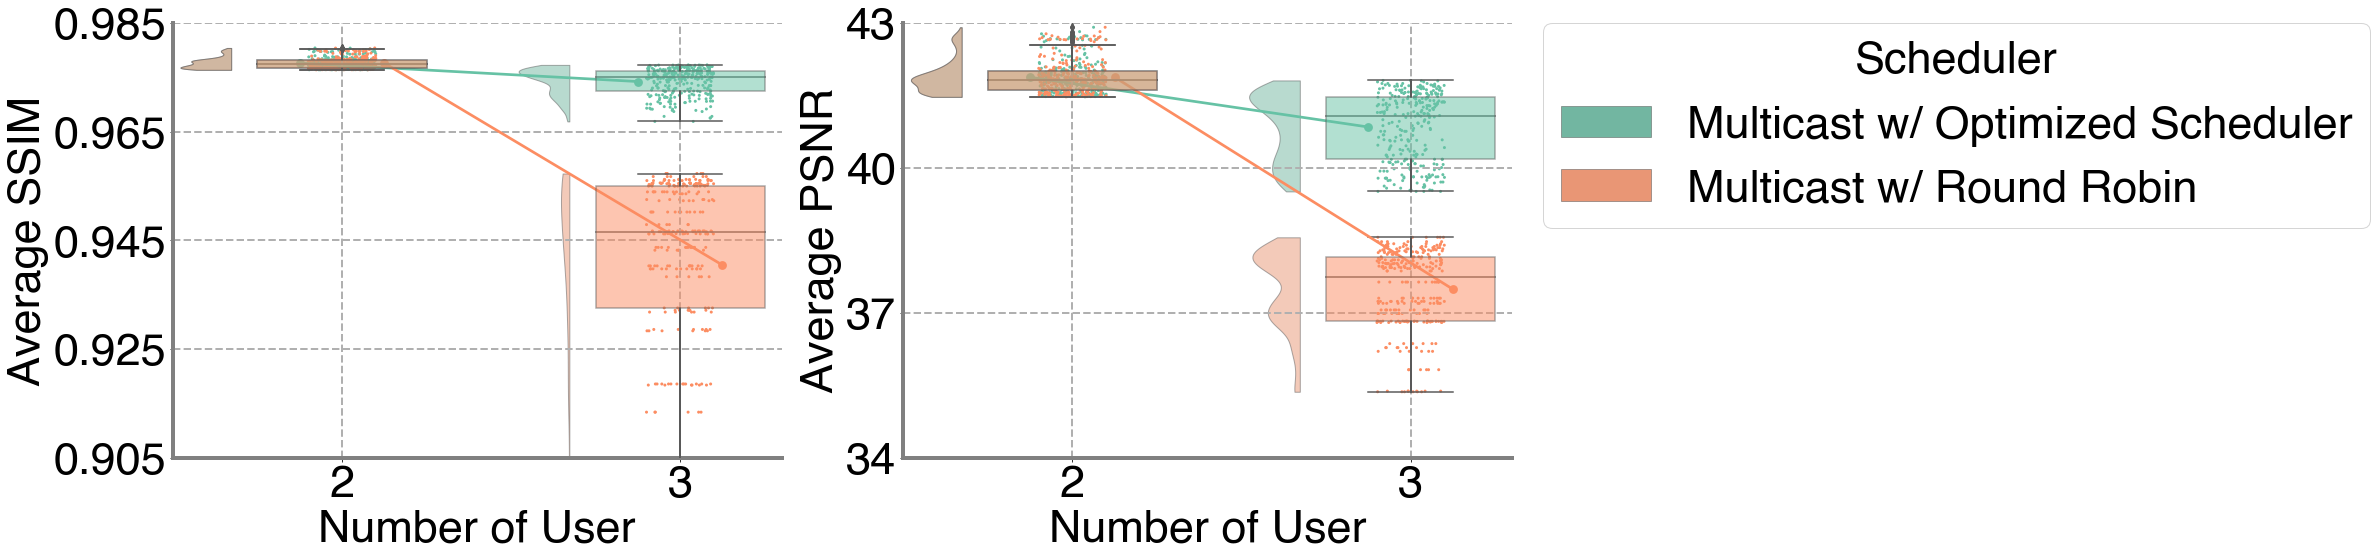

In [204]:
fig, axs = plt.subplots(1,2,figsize=(24,8), gridspec_kw={'width_ratios': [1, 1,]})
dx="Number of User"; dy1="Average SSIM"; dy2 = "Average PSNR"; dhue="Scheduler"; ort="v"; pal="Set2"; sigma = .3

pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_rr_ssim_pd, ax=axs[0],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
pt.RainCloud(x = dx, y = dy2, hue = dhue, data = dataset_rr_psnr_pd, ax=axs[1],
                palette = pal, bw = sigma, width_viol = .3, width_box = .5, orient = ort,alpha = .5, dodge = False, pointplot = True,)
#ax3.legend(loc='upper left')
axs[0].grid(True, which="both",ls="--", lw=2)
axs[0].xaxis.label.set_size(45)
axs[0].yaxis.label.set_size(45)
axs[0].tick_params(axis='both', which='major',labelsize=45)
axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
axs[0].get_legend().remove()

axs[1].grid(True, which="both",ls="--", lw=2)
axs[1].xaxis.label.set_size(45)
axs[1].yaxis.label.set_size(45)
axs[1].tick_params(axis='both', which='major',labelsize=45)
axs[1].set(ylim = [34,43], yticks = np.arange(34, 43.0001, 3))
#axs[0].set(ylim = [0.905,0.985], yticks = np.arange(0.905, 0.9851, 0.02))
#axs[1].get_legend().remove()
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
#ax3.legend(prop={'size':40})
plt.savefig('testbed_rr.pdf', bbox_inches='tight')

In [77]:
data_codingtime = sio.loadmat('coding_time.mat')['coding_time']

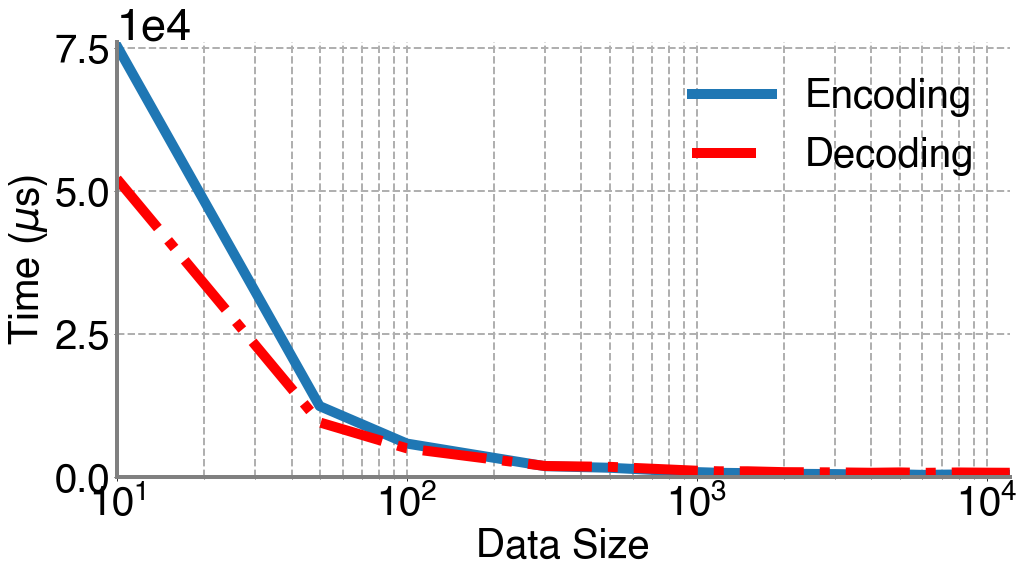

In [24]:
from matplotlib.ticker import ScalarFormatter
yfmt = ScalarFormatter()
yfmt.set_powerlimits((-4,4))  # Or whatever your limits are . . .

fig, axs = plt.subplots(1,1,figsize=(16,8), gridspec_kw={'width_ratios': [1]})

axs.semilogx(data_codingtime[:,0], data_codingtime[:,1], linestyle='-', linewidth=10)
axs.semilogx(data_codingtime[:,0], data_codingtime[:,2], linestyle='-.', color = 'red',linewidth=10)
#axs01].plot(b, new_a, linestyle='-', color = 'sienna', linewidth=8)
axs.grid(True, which="both",ls="--", lw=2)
axs.set(xlabel = 'Data Size', ylabel = 'Time ($\mu$s)', ylim = [0, 76000.001], yticks = np.arange(0, 76000.001, 25000),xlim = [10,12000], xticks = [10,100,1000,10000])
axs.xaxis.label.set_size(40)
axs.yaxis.label.set_size(40)
axs.tick_params(axis='both', which='major',labelsize=40)
#fig.tight_layout()
axs.legend(['Encoding','Decoding'], 
              fancybox=False, framealpha=0, edgecolor = 'white',loc=1, prop={'size': 40})
axs.yaxis.set_major_formatter(yfmt)
fig.savefig("coding_time.pdf")

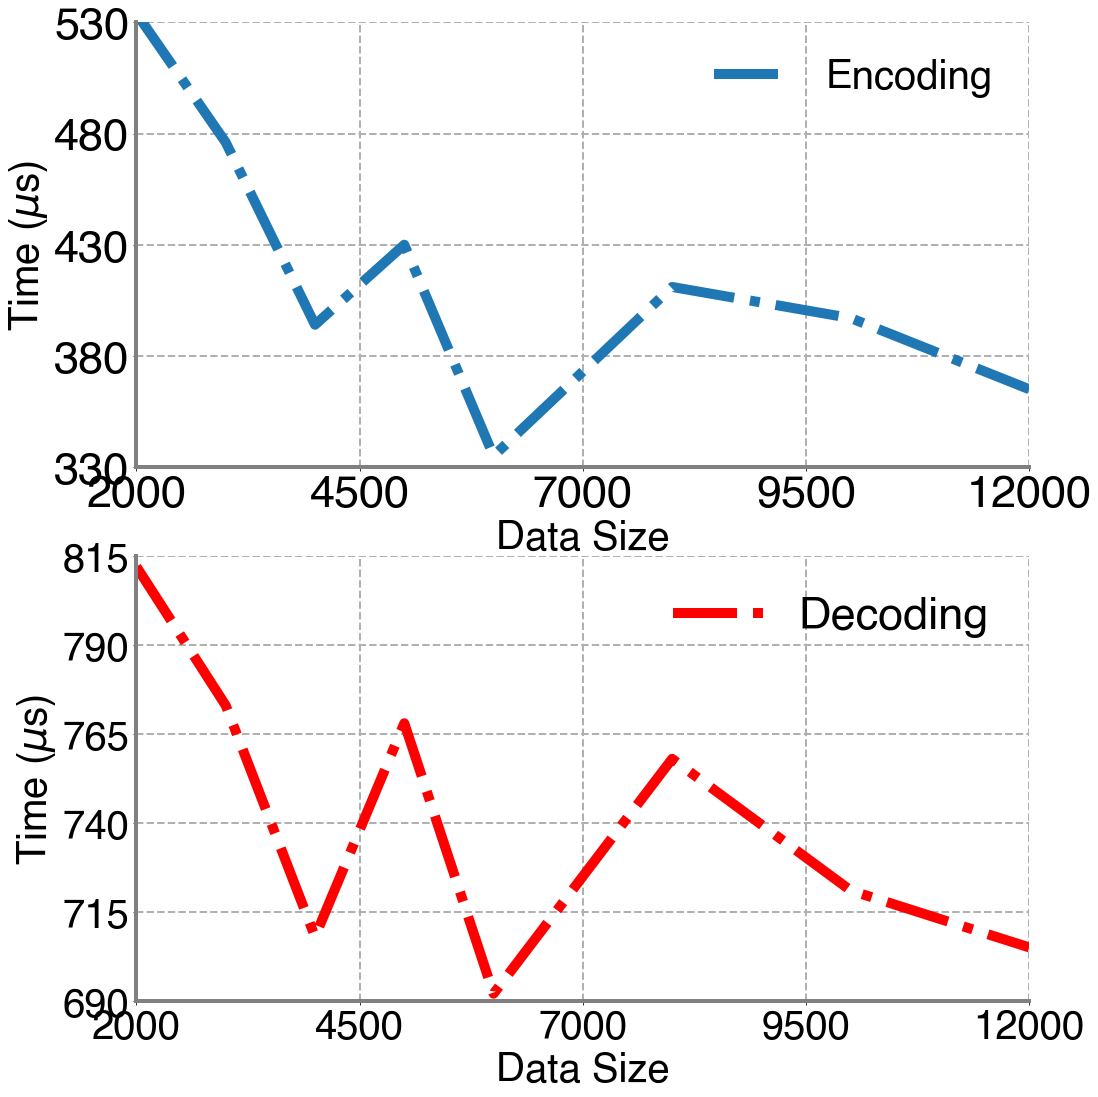

In [23]:
fig, axs = plt.subplots(2,1,figsize=(16,18), gridspec_kw={'height_ratios': [1,1]})

#axs.plot(data_codingtime[10:15,0], data_codingtime[10:15,1], linestyle='-', linewidth=10)
axs[1].plot(data_codingtime[8:,0], data_codingtime[8:,2], linestyle='-.', color = 'red',linewidth=10)
#axs01].plot(b, new_a, linestyle='-', color = 'sienna', linewidth=8)
axs[1].grid(True, which="both",ls="--", lw=2)
axs[1].set(xlabel = 'Data Size', ylabel = 'Time ($\mu$s)', ylim = [690, 815.001], yticks = np.arange(690, 815.001, 25),xlim = [2000,12000], xticks = [2000,4500,7000,9500,12000])
axs[1].xaxis.label.set_size(40)
axs[1].yaxis.label.set_size(40)
axs[1].tick_params(axis='both', which='major',labelsize=40)
#fig.tight_layout()
axs[1].legend(['Decoding'], 
              fancybox=False, framealpha=0, edgecolor = 'white',loc=1, prop={'size': 45})
#axs[0].yaxis.set_major_formatter(yfmt)

axs[0].plot(data_codingtime[8:,0], data_codingtime[8:,1], linestyle='-.', color = 'C0',linewidth=10)
#axs[1].plot(b, new_a, linestyle='-', color = 'sienna', linewidth=8)
axs[0].grid(True, which="both",ls="--", lw=2)
axs[0].set(xlabel = 'Data Size', ylabel = 'Time ($\mu$s)', ylim = [330, 530.001], yticks = np.arange(330, 530.001, 50),xlim = [2000,12000], xticks = [2000,4500,7000,9500,12000])
axs[0].xaxis.label.set_size(40)
axs[0].yaxis.label.set_size(40)
axs[0].tick_params(axis='both', which='major',labelsize=45)
#fig.tight_layout()
axs[0].legend(['Encoding'], 
              fancybox=False, framealpha=0, edgecolor = 'white',loc=1, prop={'size': 40})

fig.savefig("coding_time2.pdf")

In [205]:
dataset_plot2 =  dataset_pd[(dataset_pd['combined legend']=='Multicast (Optimized Beamforming)') | 
                            (dataset_pd['combined legend']=='Multicast (Optimized Beamforming w/ Round Robin)')]

NameError: name 'dataset_pd' is not defined

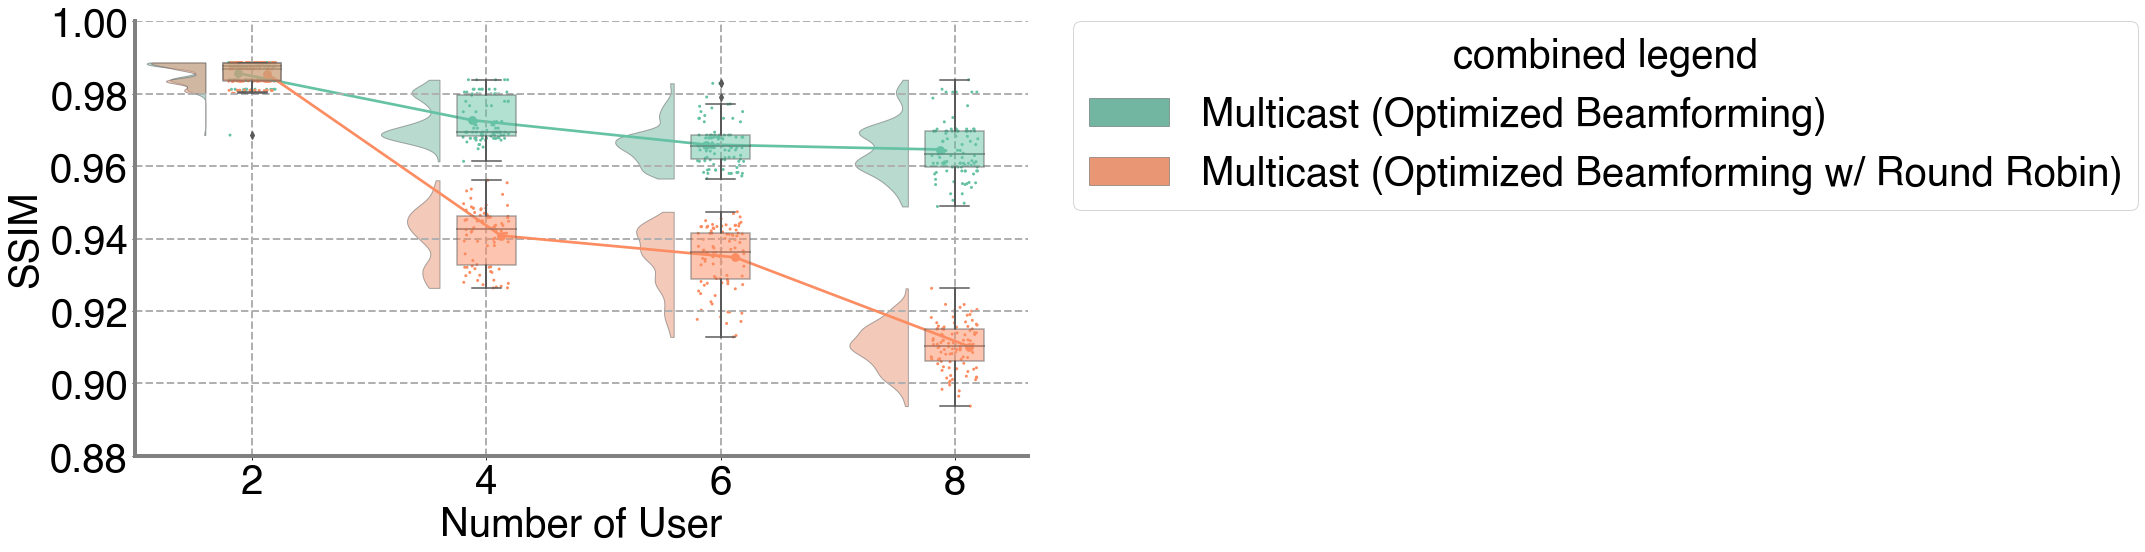

In [83]:
dx="Number of User"; dy="SSIM"; dhue="combined legend"; ort="v"; pal="Set2"; sigma = .3
ax3 = plt.figure(figsize=(16,8))
ax3=pt.RainCloud(x = dx, y = dy, hue = dhue, data = dataset_plot2,  
                palette = pal, bw = sigma, width_viol = .5, width_box = 0.25, orient = ort,alpha = .5, dodge = False, pointplot = True)
#ax3.legend(loc='upper left')
ax3.grid(True, which="both",ls="--", lw=2)
ax3.xaxis.label.set_size(40)
ax3.yaxis.label.set_size(40)
ax3.tick_params(axis='both', which='major',labelsize=40)
ax3.set(ylim = [0.88,1.0001], yticks = np.arange(0.88, 1.0001, 0.02))
#ax3.legend(fancybox=False, framealpha=0, edgecolor = 'white', prop={'size':30}, bbox_to_anchor=(1.03, 0.7))
plt.savefig('sphere_rr.pdf', bbox_inches='tight')